## Justin Butler
Math 475 -- Python 01 (Problems 6 and 7)

#### 6) Solving ordinary differential equations (ODEs): Plots and math!

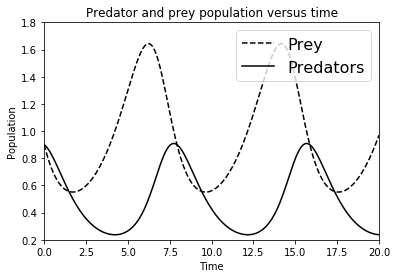

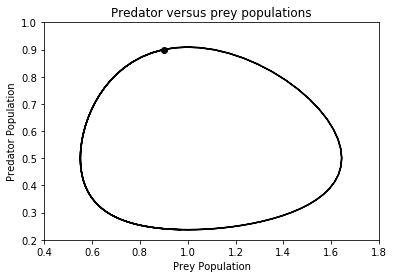

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def LotVolt(z,t,a,b,c,d):
    x = z[0]
    y = z[1]
    xp = a*x - b*x*y
    yp = c*x*y - d*y
    return np.array([xp,yp])

#define the range of my t's
trange = np.linspace(0,20,200)

#set up the variable a-d
a = 2.0/3 #the 2. allows for floating point decimal
b = 4.0/3
c = 1
d = 1

#solve the ODE
zsoln = odeint(LotVolt, [0.9,0.9], trange, (a,b,c,d))

#define the functions of the two graphs
f1 = zsoln[:,0]
f2 = zsoln[:,1]

"""Explanation of f1 and f2:
I have defined these function as one half of the matrix created by the zsoln entry. Unlike what Dr. Bisgard would have
us believe, the counting starts at 0. [:,0] is all of the elements of the matrix for the prey (the first column) and [:,1]
is all of the elements for the predator (the second column).
"""

#Starting pop vs time
plt.figure()

plt.plot(trange,f1, color='k', linestyle='--', label='Prey')
plt.plot(trange,f2, color='k', label='Predators')

"""Explanation of coordinates:
For the plots of these two graphs, it is important to not use every single t value. This is because the ordinary differential
equation I use is being defined within certain t values, and therefore I need to use the same t values to graph it.
Thus, for the x-coordinates of the graph, I call "trange" rather than using every t
"""

plt.legend(fontsize=16)
plt.title("Predator and prey population versus time")
plt.xlabel("Time")
plt.ylabel("Population")
plt.xlim(0,20)
plt.ylim(0.2,1.8)
plt.show()
plt.close()

#Starting phase plane
plt.figure()

plt.plot(f1,f2, color='k')
plt.title("Predator versus prey populations")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.xlim(0.4,1.8)
plt.ylim(0.2,1.0)
plt.plot(zsoln[0,0],zsoln[0,1], 'o', color='k') #the 'o' makes it a point and not a graph
#I also called zsoln directly and used the first term of each vector column 

plt.show()
plt.close() #don't forget to save memory!

##### Explanation of 6:
(note: Also see documentation in code)
1) zsoln after runing odeint() outputs a column vector. In the first column, the numbers correspond to the values of the prey population for a given t value. In the second column, the numbers correspond to the values of the predetor population for a given t value.

2) The data has a cyclic appearance as t increases. In the problem we have to distinguish two different z'(t). In the context of x(t), z' is the change of prey population. In the context of y(t), z' is the change of predator population. The two are cyclic because they depend off each other. The predator population directly affects the growth rate of the prey population, but it is the rate of growth for the prey population that affects the growth rate of the predator population.

3) In these two different graphs I am plotting the population of the two separate groups in regard to the same time steps.

#### 7) Lotka-Volterra: Modeling several starting conditions

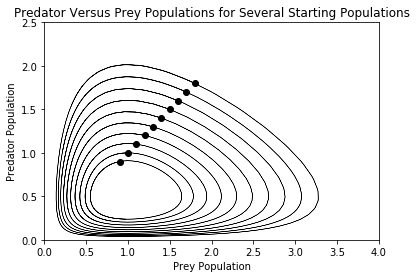

In [20]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def LotVolt(z,t,a,b,c,d):
    x = z[0]
    y = z[1]
    xp = a*x - b*x*y
    yp = c*x*y - d*y
    return np.array([xp,yp])

#define the range of my t's
trange = np.linspace(0,20,200)

#set up the variable a-d
a = 2.0/3 #the 2. allows for floating point decimal
b = 4.0/3
c = 1
d = 1

#Before the loop, setting a starting point,starting color, and begining the plot
start = 0.9
plt.figure()

for i in range(10):
    #Setting up the differential
    zsoln = odeint(LotVolt, [start,start], trange, (a,b,c,d))
    f1 = zsoln[:,0]
    f2 = zsoln[:,1]
    plt.plot(f1,f2, color='k',linewidth=0.5)
    plt.plot(zsoln[0,0],zsoln[0,1],'o',color='k')
    start = start+0.1

#End of for loop
#Finish up plot information
plt.title("Predator Versus Prey Populations for Several Starting Populations")
plt.xlabel("Prey Population")
plt.ylabel("Predator Population")
plt.xlim(0,4)
plt.ylim(0,2.5)
plt.show()
plt.close()
    

##### Explanation of 7
I had to use a for loop because the process of plotting had to be repeated a certain, set, number of times. Each iteration of the for loop I was changing the starting population of predators and prey. Although the initial condition did not need to be in the for loop, the change did. This is because I needed a way to allow the computer to change the starting populations every iteration. Thus, in order to meet that requirement, during every iteration a command had to be called to change the starting population number.